In [16]:
from pulp import *
import utils

In [17]:
INSTANCE_NUMBER = 2
ALL_SOLUTIONS = False
ROTATION = True

file_path = f"../instances/ins-{INSTANCE_NUMBER}.txt"
w, n, dims = utils.read_output(file_path)

In [18]:
WIDTH = 0
HEIGHT = 1

In [19]:
upper_bound = sum(dims[:, HEIGHT])
k = 4

In [20]:
prob = LpProblem("VLSI", LpMinimize)

In [21]:
L = LpVariable("L", 0, upper_bound, LpInteger)
pos_x = LpVariable.dicts("pos_x", range(n), 0, w, LpInteger)
pos_y = LpVariable.dicts("pos_y", range(n), 0, upper_bound, LpInteger)

In [22]:
M0 = M1 = w
M2 = M3 = upper_bound

In [23]:
pos_chosen = LpVariable.dict("pos_chosen", (range(n), range(n), range(k)), 0, 1, LpInteger)
rotated = LpVariable.dict("rotated", range(n), 0, 1, LpInteger)

In [24]:
prob += L

In [25]:
if ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]*(1-rotated[i])+ rotated[i]*dims[i, WIDTH]
        for j in range(i + 1, n):
            prob += pos_x[i] + (1-rotated[i])*dims[i, WIDTH] + rotated[i]*dims[i, HEIGHT]<= pos_x[j] + M0 * (pos_chosen[i, j, 0])
            prob += pos_x[j] + (1-rotated[j])*dims[j, WIDTH] + rotated[j]*dims[j, HEIGHT] <= pos_x[i] + M1 * (pos_chosen[i, j, 1])
            prob += pos_y[i] + (1-rotated[i])*dims[i, HEIGHT] + rotated[i]*dims[i, WIDTH]<= pos_y[j] + M2 * (pos_chosen[i, j, 2])
            prob += pos_y[j] + (1-rotated[j])*dims[j, HEIGHT] + rotated[j]*dims[j, WIDTH]<= pos_y[i] + M3 * (pos_chosen[i, j, 3])
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= 3

    prob += pos_x[n-1] + (1-rotated[n-1])*dims[n-1, WIDTH] + rotated[n-1]*dims[n-1, HEIGHT] <= M1   
   

In [26]:
if not ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]
        for j in range(i + 1, n):
            prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * pos_chosen[i, j, 0]
            prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * pos_chosen[i, j, 1]
            prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * pos_chosen[i, j, 2]
            prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * pos_chosen[i, j, 3]
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= k - 1


In [27]:
status = prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/148b1366a7f1497cba79b61a80b5da47-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/148b1366a7f1497cba79b61a80b5da47-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 61 COLUMNS
At line 392 RHS
At line 449 BOUNDS
At line 506 ENDATA
Problem MODEL has 56 rows, 56 columns and 208 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3 - 0.00 seconds
Cgl0004I processed model has 56 rows, 55 columns (55 integer (44 of which binary)) and 208 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 36 integers unsatisfied sum - 8.44444
Cbc0038I Pass   1: suminf.    3.88889 (19) obj. 6 iterations 24

In [28]:
LpStatus[status]

'Optimal'

In [29]:
print(f"value of L: {value(L)}")
sol = []
sol.append([w, value(L)])
sol.append([n])
for i in range(n):
    print(i)
    
    width = dims[i, int(value(rotated[i]))]
    height = dims[i, 1-int(value(rotated[i]))]
    
    sol.append([width, height, int(value(pos_x[i])), int(value(pos_y[i]))])
    print(value(pos_x[i]), value(pos_y[i]))

value of L: 9.0
0
0.0 3.0
1
0.0 6.0
2
4.0 6.0
3
3.0 3.0
4
0.0 0.0


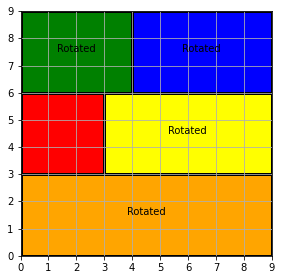

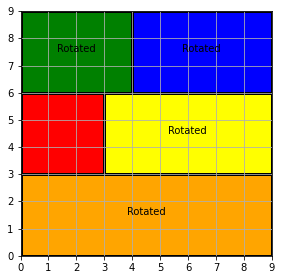

In [30]:
utils.visualize_output(sol, dims)